In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore",category = UserWarning, module="sklearn")

In [13]:
# Loading and preprocessing

In [15]:
iris = load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [17]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [23]:
data.duplicated().sum()

1

In [25]:
data = data.drop_duplicates()

In [27]:
# To find Outliers

<Axes: >

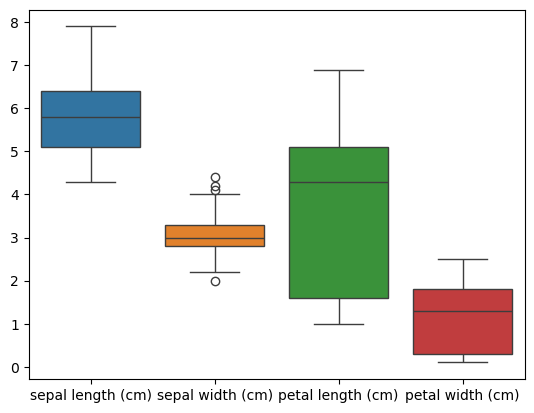

In [29]:
sns.boxplot(data)

In [31]:
print("skewness:",data.skew())

skewness: sepal length (cm)    0.312826
sepal width (cm)     0.307149
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64


In [33]:
print("kurtosis:",data.kurt())

kurtosis: sepal length (cm)   -0.569006
sepal width (cm)     0.226236
petal length (cm)   -1.408270
petal width (cm)    -1.339953
dtype: float64


In [35]:
#Clustering Algorithm Implementation

In [37]:
x = data.copy()

In [39]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [41]:
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


In [ ]:
# K Means Clustering
# Provide a brief description of how KMeans clustering works.
KMeans Clustering is an iterative algorithm that assigns each data point to one of 𝑘 clusters based on the distance 
to the cluster centers (centroids).
# Explain why KMeans clustering might be suitable for the Iris dataset.
The Iris dataset is relatively small and well-suited for KMeans.
Since we have numerical features and distinct clusters, KMeans is an effective method for clustering.
                                                                                    

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(x_scaled)

In [45]:
x_scaled['Cluster'] = clusters

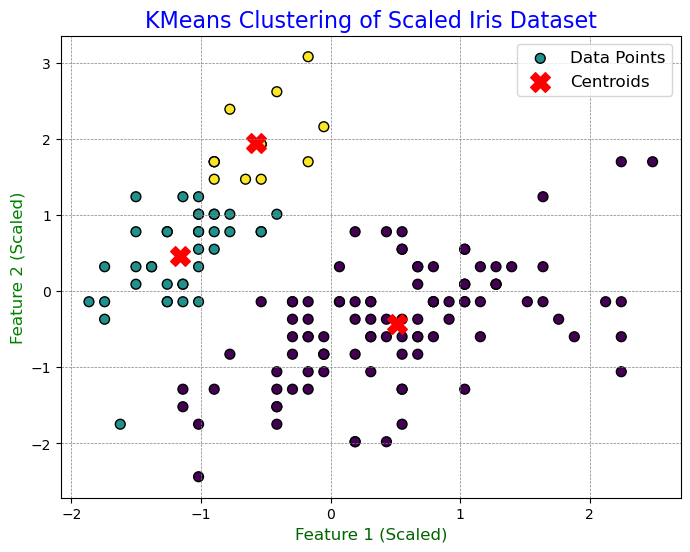

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled.iloc[:, 0], x_scaled.iloc[:, 1], c=clusters, cmap='viridis', s=50,edgecolor='k',label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X',label='Centroids')
plt.title("KMeans Clustering of Scaled Iris Dataset", fontsize=16, color='blue')
plt.xlabel("Feature 1 (Scaled)", fontsize=12, color='darkgreen')
plt.ylabel("Feature 2 (Scaled)", fontsize=12, color='green')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right')
plt.show()

In [49]:
# Elbow method
inertia = [] 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled.iloc[:, :-2])  
    inertia.append(kmeans.inertia_)

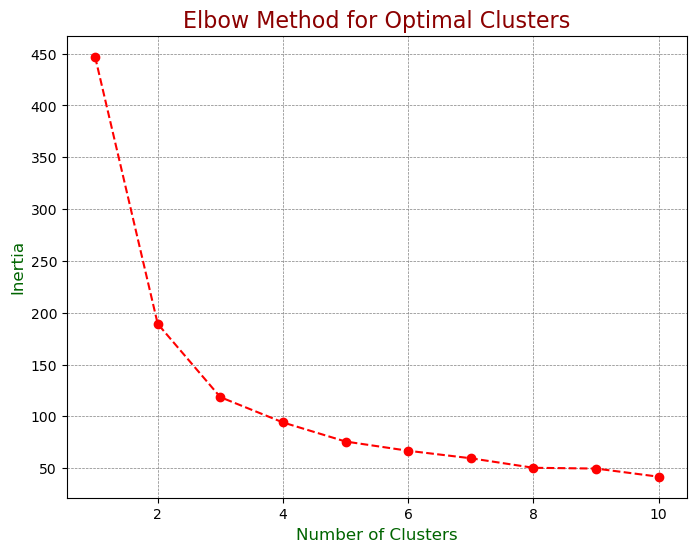

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='r')
plt.title("Elbow Method for Optimal Clusters", fontsize=16, color='darkred')
plt.xlabel("Number of Clusters", fontsize=12, color='darkgreen')
plt.ylabel("Inertia", fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
# Hierarchical clustering
# Provide a brief description of how Hierarchical clustering works.
Hierarchical Clustering builds a hierarchy of clusters either in a bottom-up (Agglomerative) or top-down (Divisive) approach.
Agglomerative Clustering starts with each data point as its own cluster and progressively merges the closest clusters.
# Explain why Hierarchical clustering might be suitable for the Iris dataset.
Hierarchical Clustering is particularly useful for small datasets like Iris.
The dendrogram allows us to visualize the merging process and decide on the number of clusters based on a threshold distance.

In [55]:
# Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.
#Aglomerative clustering

hrl = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_h = hrl.fit_predict(x_scaled.iloc[:, :-1])
x_scaled['Cluster_H'] = clusters_h

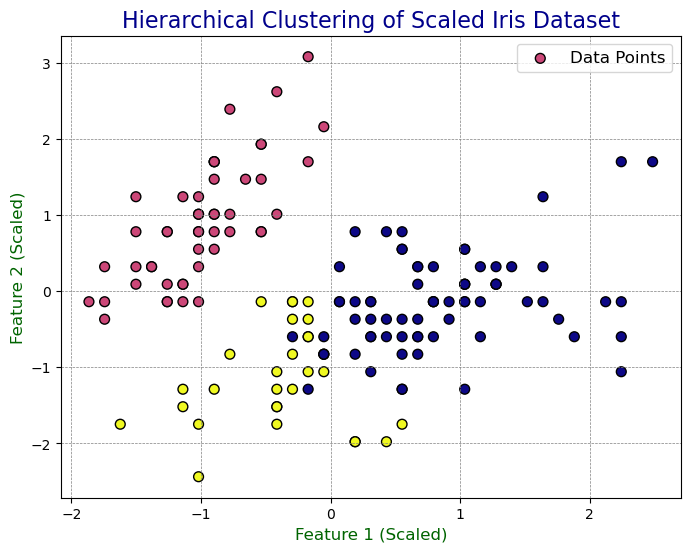

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled.iloc[:, 0], x_scaled.iloc[:, 1], c=clusters_h, cmap='plasma', s=50, edgecolor='k',label='Data Points')
plt.title("Hierarchical Clustering of Scaled Iris Dataset", fontsize=16, color='darkblue')
plt.xlabel("Feature 1 (Scaled)", fontsize=12, color='darkgreen')
plt.ylabel("Feature 2 (Scaled)", fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right')
plt.show()

In [ ]:
# Dendrogram
 shows how clusters are merged and can help determine an optimal cutoff.

In [61]:
linkage_matrix = linkage(x_scaled.iloc[:, :-2], method='ward')

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=3, color_threshold=0.7 * max(linkage_matrix[:, 2]))
plt.axhline(y=5, color='red', linestyle='--', label='Threshold Line')
plt.title("Hierarchical Clustering Dendrogram", fontsize=16, color='darkblue')
plt.xlabel("Data Points", fontsize=12, color='darkgreen')
plt.ylabel("Distance", fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()